In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl
import matplotlib.pyplot as plt
import statistics as st
%matplotlib inline

In [3]:
train = pd.read_excel('XY_train.xlsx')
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,13163,city_16,0.910,NaN,No relevent experience,no_enrollment,High School,NaN,2,NaN,NaN,never,16,1
1,9357,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,6,1000-4999,Pvt Ltd,1,262,0
2,604,city_16,0.910,Male,No relevent experience,NaN,NaN,NaN,3,NaN,NaN,never,24,0
3,19033,city_16,0.910,Male,No relevent experience,no_enrollment,High School,NaN,3,NaN,NaN,1,35,0
4,4825,city_145,0.555,Male,Has relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,1,43,1


### city

In [4]:
# 122 cities
train['city'].value_counts()

city_103    3455
city_21     2123
city_16     1242
city_114    1089
city_160     663
city_136     473
city_67      347
city_75      245
city_102     243
city_104     235
city_73      225
city_100     218
city_71      216
city_11      202
city_90      168
city_61      161
city_28      150
city_23      148
city_65      134
city_36      124
city_173     123
city_50      113
city_83      110
city_162     106
city_46      104
city_116     101
city_19       98
city_45       97
city_138      92
city_149      87
            ... 
city_175      11
city_59       10
city_127       9
city_43        9
city_39        9
city_131       9
city_106       8
city_133       8
city_146       7
city_109       7
city_2         6
city_167       6
city_81        6
city_79        5
city_180       5
city_179       5
city_120       5
city_166       4
city_31        4
city_107       4
city_62        4
city_139       4
city_8         4
city_18        3
city_82        3
city_25        3
city_111       3
city_129      

### city_development_index

In [5]:
# 0.448 - 0.949
train['city_development_index'].min()
train['city_development_index'].max()
train['city_development_index'].value_counts()

0.920    4118
0.624    2123
0.910    1242
0.926    1089
0.698     564
0.897     473
0.939     395
0.855     347
0.804     243
0.924     235
0.754     225
0.887     218
0.884     216
0.550     202
0.913     161
0.899     148
0.925     139
0.802     134
0.893     124
0.878     123
0.743     113
0.827     113
0.896     113
0.923     110
0.579     107
0.767     106
0.762     104
0.682      98
0.890      97
0.836      92
         ... 
0.725      15
0.448      15
0.739      13
0.640      13
0.556      11
0.493      11
0.563      11
0.775      10
0.680       9
0.745       9
0.898       9
0.516       9
0.742       8
0.701       7
0.735       7
0.730       6
0.788       6
0.921       6
0.780       5
0.512       5
0.487       4
0.807       4
0.518       4
0.649       4
0.645       4
0.693       3
0.824       3
0.625       3
0.781       2
0.664       1
Name: city_development_index, Length: 93, dtype: int64

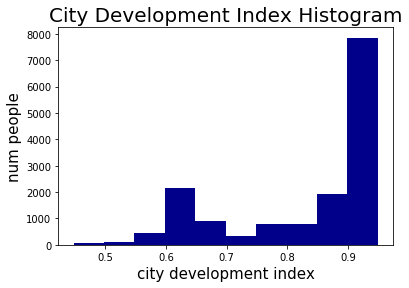

In [8]:
plt.hist(train['city_development_index'], bins=10, color='darkblue')
plt.title("City Development Index Histogram", fontsize=20)
plt.xlabel('city development index', fontsize=15)
plt.ylabel('num people', fontsize=15)
# plt.grid()
plt.show()

In [44]:
# train[['city_development_index', 'target']]
# dev_and_tar = train.groupby(['city_development_index', 'target']).size()
# dev_and_tar = dev_and_tar.to_frame()
# dev_and_tar.reset_index(inplace=True) 
# dev_and_tar.rename(columns = {list(dev_and_tar)[2]: 'count'}, inplace = True)
# dev_and_tar

,city_development_index,target,count
0,0.448,0,4
1,0.448,1,11
2,0.479,0,11
3,0.479,1,12
4,0.487,0,1
5,0.487,1,3
6,0.493,0,5
7,0.493,1,6
8,0.512,0,2
9,0.512,1,3


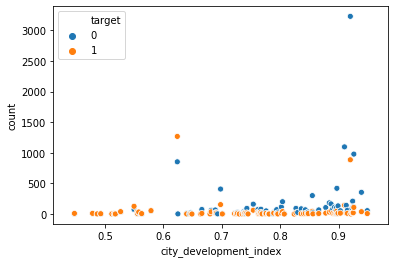

In [45]:
# sns.scatterplot(x='city_development_index', y='count', hue='target', data=dev_and_tar)
# # plt.savefig('file_path.png', bbox_inches='tight')
# plt.show()

### gender

In [64]:
gender_dist = train['gender'].value_counts(dropna=False)
gender_dist

Male      10550
NaN        3639
Female      987
Other       150
Name: gender, dtype: int64

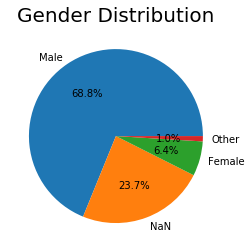

In [65]:
plt.pie(gender_dist, labels=['Male','NaN','Female','Other'], autopct='%1.1f%%')
plt.title("Gender Distribution", fontsize=20)
# plt.legend()
plt.show()

### relevent_experience

In [67]:
relevent_experience_dist = train['relevent_experience'].value_counts(dropna=False)
relevent_experience_dist

Has relevent experience    11064
No relevent experience      4262
Name: relevent_experience, dtype: int64

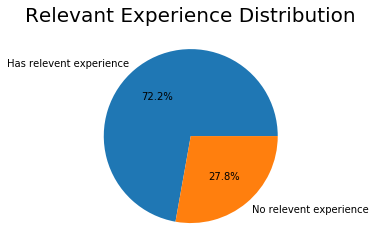

In [68]:
plt.pie(relevent_experience_dist, labels=['Has relevent experience','No relevent experience'], autopct='%1.1f%%')
plt.title("Relevant Experience Distribution", fontsize=20)
plt.show()

### enrolled_university

In [69]:
train['enrolled_university'].value_counts(dropna=False)

no_enrollment       11036
Full time course     3026
Part time course      953
NaN                   311
Name: enrolled_university, dtype: int64

In [70]:
enr_uni = train['enrolled_university'].value_counts(dropna=False).to_frame()
enr_uni.reset_index(inplace=True) 
enr_uni.rename(columns = {list(enr_uni)[0]: 'enrolled_university', list(enr_uni)[1]: 'count'}, inplace = True)
enr_uni['enrolled_university'].fillna("NaN", inplace=True)
enr_uni

,enrolled_university,count
0,no_enrollment,11036
1,Full time course,3026
2,Part time course,953
3,NaN,311


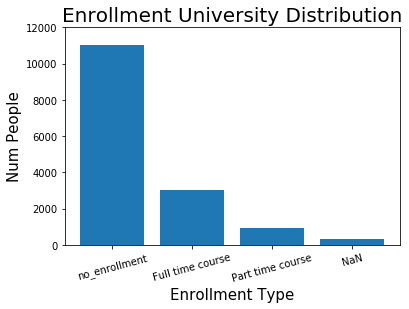

In [103]:
plt.bar(x=enr_uni['enrolled_university'], height=enr_uni['count'])
plt.title("Enrollment University Distribution", fontsize=20)
plt.xlabel('Enrollment Type', fontsize=15)
plt.ylabel('Num People', fontsize=15)
plt.xticks(rotation=15)
plt.ylim(0, 12000)
plt.show()

### education_level

In [73]:
train['education_level'].value_counts(dropna=False)

Graduate          9305
Masters           3484
High School       1590
NaN                370
Phd                323
Primary School     254
Name: education_level, dtype: int64

In [79]:
edc = train['education_level'].value_counts(dropna=False).to_frame()
edc.reset_index(inplace=True) 
edc.rename(columns = {list(edc)[0]: 'education_level', list(edc)[1]: 'count'}, inplace = True)
edc['education_level'].fillna("NaN", inplace=True)
edc['rank'] = [3,2,4,6,1,5]
edc.sort_values(['rank'], inplace=True)
edc

,education_level,count,rank
4,Phd,323,1
1,Masters,3484,2
0,Graduate,9305,3
2,High School,1590,4
5,Primary School,254,5
3,NaN,370,6


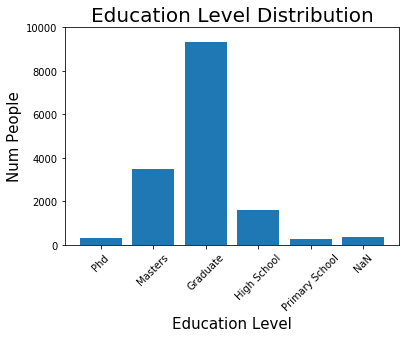

In [99]:
plt.bar(x=edc['education_level'], height=edc['count'])
plt.title("Education Level Distribution", fontsize=20)
plt.xlabel('Education Level', fontsize=15)
plt.ylabel('Num People', fontsize=15)
plt.xticks(rotation=45)
plt.ylim(0, 10000)
plt.show()

### major_discipline

In [47]:
train['major_discipline'].value_counts(dropna=False)

STEM               11612
NaN                 2237
Humanities           527
Other                295
Business Degree      273
Arts                 204
No Major             178
Name: major_discipline, dtype: int64

In [104]:
disc = train['major_discipline'].value_counts(dropna=False).to_frame()
disc.reset_index(inplace=True) 
disc.rename(columns = {list(disc)[0]: 'major_discipline', list(disc)[1]: 'count'}, inplace = True)
disc['major_discipline'].fillna("NaN", inplace=True)
disc

,major_discipline,count
0,STEM,11612
1,NaN,2237
2,Humanities,527
3,Other,295
4,Business Degree,273
5,Arts,204
6,No Major,178


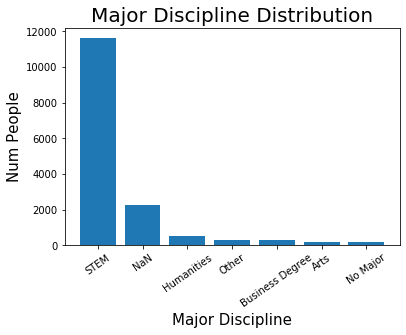

In [116]:
plt.bar(x=disc['major_discipline'], height=disc['count'])
plt.title("Major Discipline Distribution", fontsize=20)
plt.xlabel('Major Discipline', fontsize=15)
plt.ylabel('Num People', fontsize=15)
plt.xticks(rotation=35)
# plt.ylim(0, 10000)
plt.show()

### experience

In [48]:
train['experience'].value_counts(dropna=False)

>20    2620
5      1161
4      1097
3      1084
6       979
2       889
7       825
9       804
10      789
8       636
15      572
11      525
14      478
1       435
<1      406
16      403
12      393
13      313
17      282
19      249
18      223
20      115
NaN      48
Name: experience, dtype: int64

### company_size

In [49]:
train['company_size'].value_counts(dropna=False)

NaN                    4779
50-99                  2459
100-500                2053
10000+                 1613
1949-10-01 00:00:00    1142
1000-4999              1074
<10                    1045
500-999                 700
5000-9999               461
Name: company_size, dtype: int64

### company_type

In [50]:
train['company_type'].value_counts(dropna=False)

Pvt Ltd                7868
NaN                    4943
Funded Startup          779
Public Sector           750
Early Stage Startup     494
NGO                     392
Other                   100
Name: company_type, dtype: int64

### last_new_job

In [51]:
train['last_new_job'].value_counts(dropna=False)

1        6487
>4       2612
2        2303
never    1960
4         824
3         808
NaN       332
Name: last_new_job, dtype: int64

### training_hours

In [52]:
train['training_hours'].value_counts(dropna=False)

28     269
18     232
12     232
22     228
24     226
50     222
17     218
6      216
20     212
34     202
14     201
26     200
10     198
11     198
21     197
48     197
23     197
9      196
56     195
8      186
42     186
15     185
46     183
4      173
32     168
44     167
36     166
25     166
7      161
43     160
      ... 
320      9
262      9
278      9
254      8
336      8
1        8
310      8
260      8
268      8
284      8
306      8
290      7
282      7
324      7
302      7
288      7
228      7
312      7
280      6
276      6
244      6
294      6
266      5
236      5
240      5
270      5
234      4
238      4
272      4
286      3
Name: training_hours, Length: 241, dtype: int64

### target (0-not looking, 1-looking)

In [53]:
train['target'].value_counts(dropna=False)

0    11501
1     3825
Name: target, dtype: int64